In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/1A 1744-361.txt")

1A 1744-361
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,1A 1744-361,68,[Mason et al. 2024 & https://ui.adsabs.harvard...,[Crook-Mansour et al. (in prep) &],NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,1A 1744-361,1654038686,L,59730.97968,0.01042,rise,IMS,1.240,0.064846,18.251,-0.2,-0.1,False
1,1A 1744-361,1654290075,L,59733.93079,0.01042,unclear,SS,1.062,0.056068,19.546,-0.3,-0.1,False
2,1A 1744-361,1655070377,L,59742.96301,0.01042,decay,SS,0.570,0.034253,19.312,-0.6,-0.1,False
3,1A 1744-361,1655498179,L,59747.91150,0.01042,decay,SS,0.129,0.043000,19.730,NaN,NaN,True
4,1A 1744-361,1656540372,L,59759.97549,0.01042,decay,SS,0.087,0.018518,18.539,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,1A 1744-361,31222007,59731.7449,0.20072,rise,IMS,2.800000e-09,2.802469e-10,2.802464e-10,tbabs * (diskbb + bbody),chi,False
1,1A 1744-361,31222008,59735.7478,0.00847,unclear,SS,3.873000e-09,3.953973e-10,3.954155e-10,tbabs * (diskbb + bbody),chi,False
2,1A 1744-361,31222009,59749.1570,0.00383,decay,SS,3.783000e-09,3.945596e-10,3.946165e-10,tbabs * (diskbb + bbody),chi,False
3,1A 1744-361,31222010,59759.7656,0.00198,decay,SS,2.791000e-09,2.992310e-10,2.993394e-10,tbabs * (diskbb + bbody),chi,False


# Light Curves
NOTE: The radio data differs from the paper because of the slightly different way upper limits vs detections were dealt with.

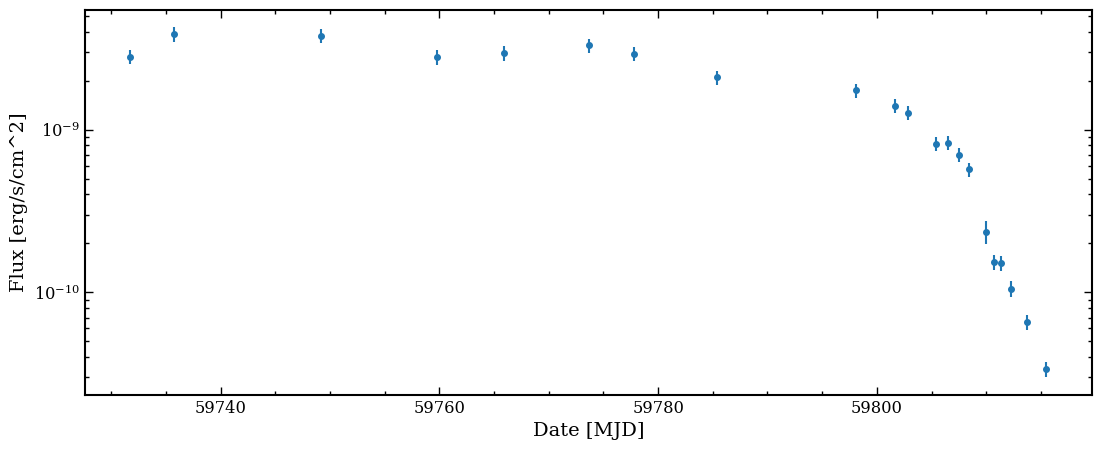

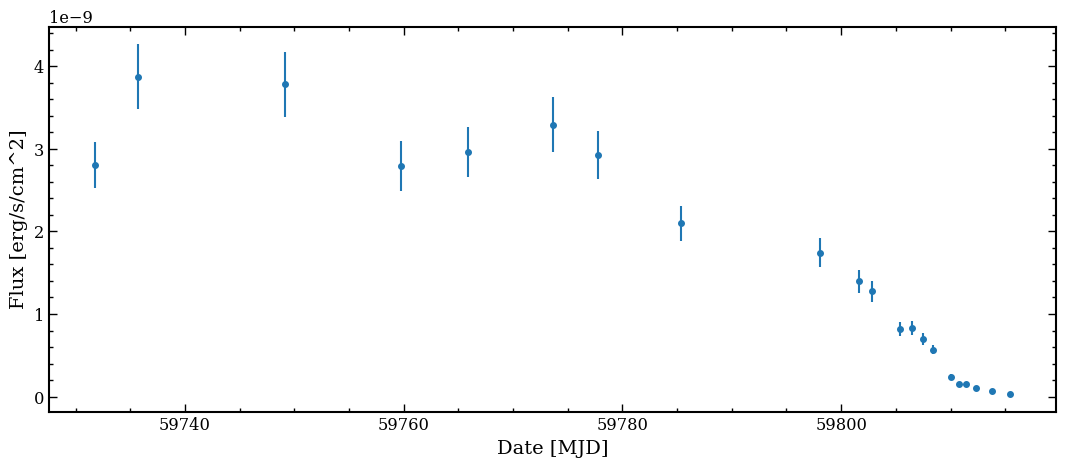

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

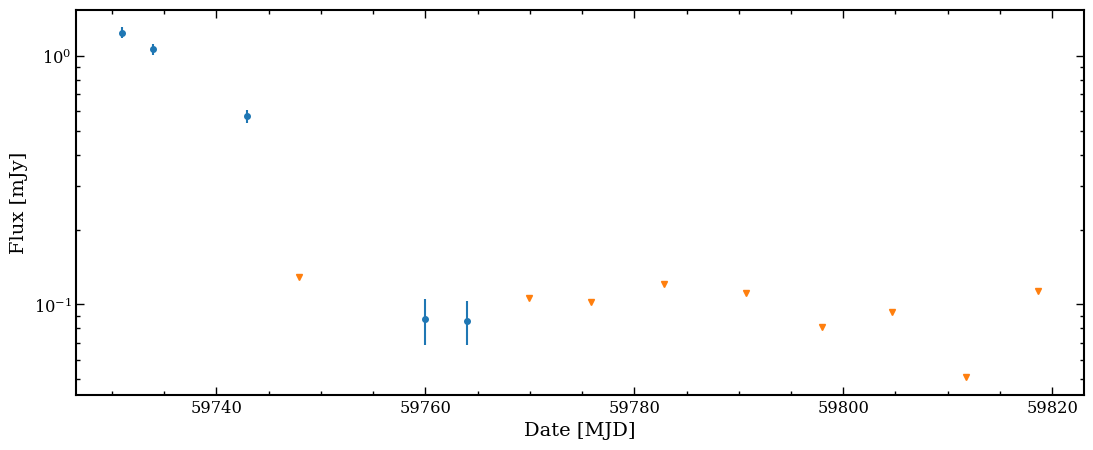

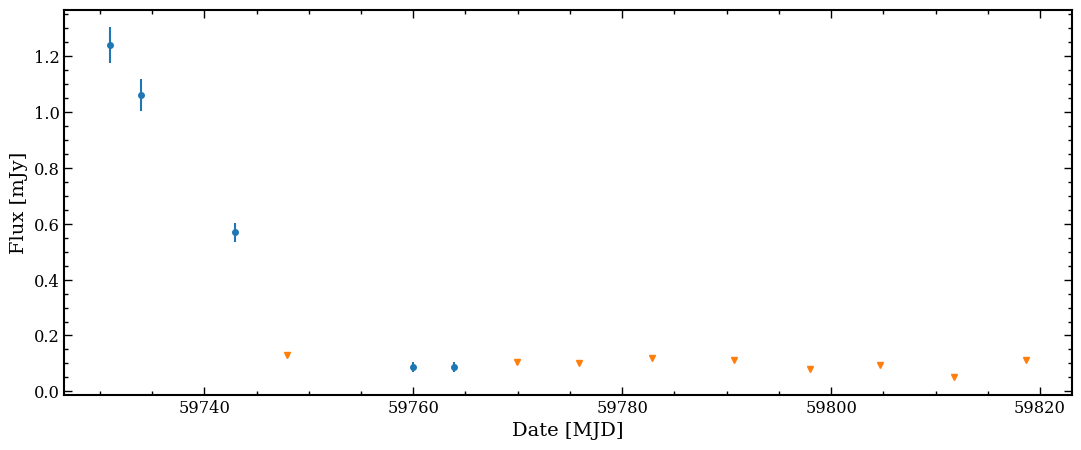

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing
There is no paper to compare against, since the published paper used NICER data.

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59730.979680000     1.24000             0.06485             1         2.80000e-09                   2.80247e-10                   2.80246e-10                   False          False          IMS            
59759.975490000     0.08700             0.01852             1         2.79100e-09                   2.99231e-10                   2.99339e-10                   False          False          SS             
59797.938670000     0.08100             0.02700             1         1.74200e-09                   1.76422e-10                   1.76425e-10                   True           False          SS             
59804.663410000     0.09300             0.03100             1         8.19400e-10                   8.23414e-11                   8.23385e-11                   True           F

In [9]:
paired_data[["t", "Fr", "Fr_unc"]]

,t,Fr,Fr_unc
0,59730.97968,1.240,0.064846
1,59759.97549,0.087,0.018518
2,59797.93867,0.081,0.027000
3,59804.66341,0.093,0.031000
4,59811.75657,0.051,0.017000


In [10]:
paired_data[["t", "Lr", "Lx"]]

,t,Lr,Lx
0,59730.97968,1.215663e+29,2.144567e+37
1,59759.97549,8.529251e+27,2.137674e+37
2,59797.93867,7.941027e+27,1.334227e+37
3,59804.66341,9.117475e+27,6.275923e+36
4,59811.75657,4.999906e+27,9.261918e+35


In [11]:
# TESTING
# For 59811, the 3-sigma uplim is 0.051mJy
# Use a distance of 8kpc
# This gives a luminosity:
L, L_unc = convert_Fr(Fr_mJy=0.051, Fr_mJy_unc=0.051/3, d_kpc=8, d_kpc_unc=0)
print(L)


4.999905858198397e+27


In [12]:
lr_all, lx_all, all_types = get_bahramian_data()

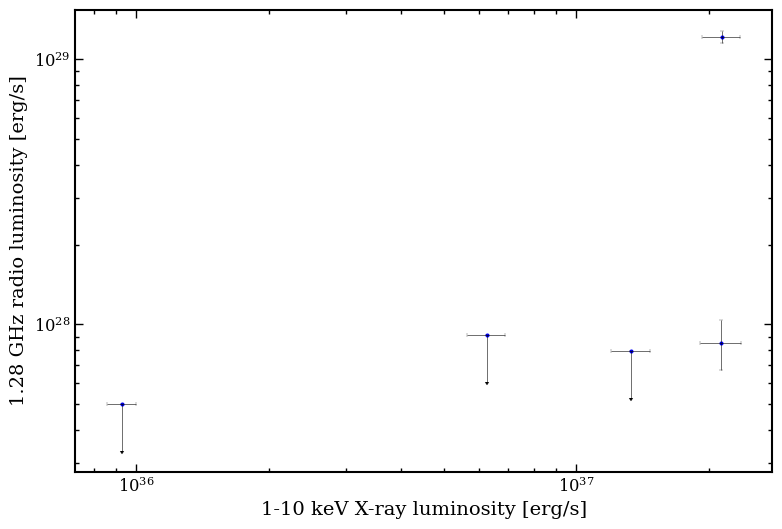

In [13]:
plot_Lr_Lx(paired_data)

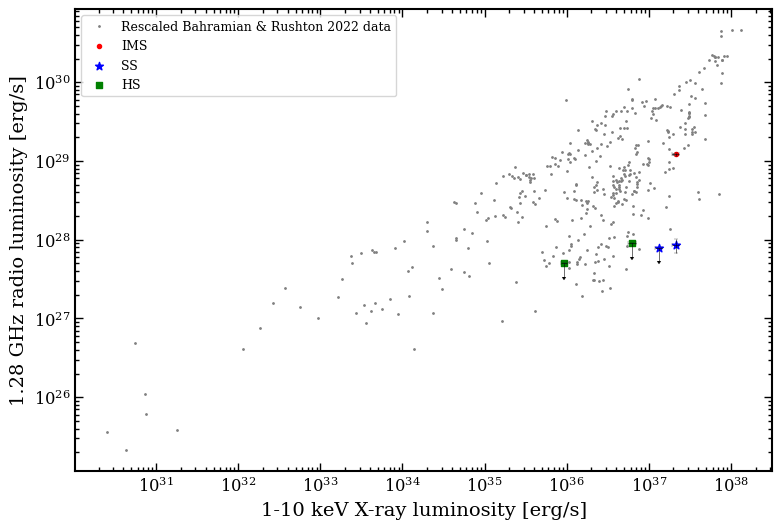

In [14]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  83
59730.97968: time_to_nearest: 0.7652200000011362 & time_to_furthest: 59730.97968; y_predict_err: 0.04580003475087935
59733.93079: time_to_nearest: 1.8170099999988452 & time_to_furthest: 2.1858900000006543; y_predict_err: 0.03859326594728962
Rejected based on distance: radio_MJD = 59742.96301; time_to_nearest: 6.193989999999758; time_to_furthest: 7.215210000002116
Rejected based on distance: radio_MJD = 59747.9115; time_to_nearest: 1.2454999999972642; time_to_furthest: 12.16370000000461
59759.97549: time_to_nearest: 0.20988999999826774 & time_to_furthest: 5.9546100000006845; y_predict_err: 0.04819846279070816
59763.94295: time_to_nearest: 1.9871500000008382 & time_to_furthest: 4.177349999998114; y_predict_err: 0.03764900908675983
Rejected based on distance: radio_MJD = 59769.89522; time_to_nearest: 3.7965800000019954; time_to_furthest: 3.965120000000752
59775.8317: time_to_nearest: 1.9749999999985448 & time_to_furthest: 2.1399000000019

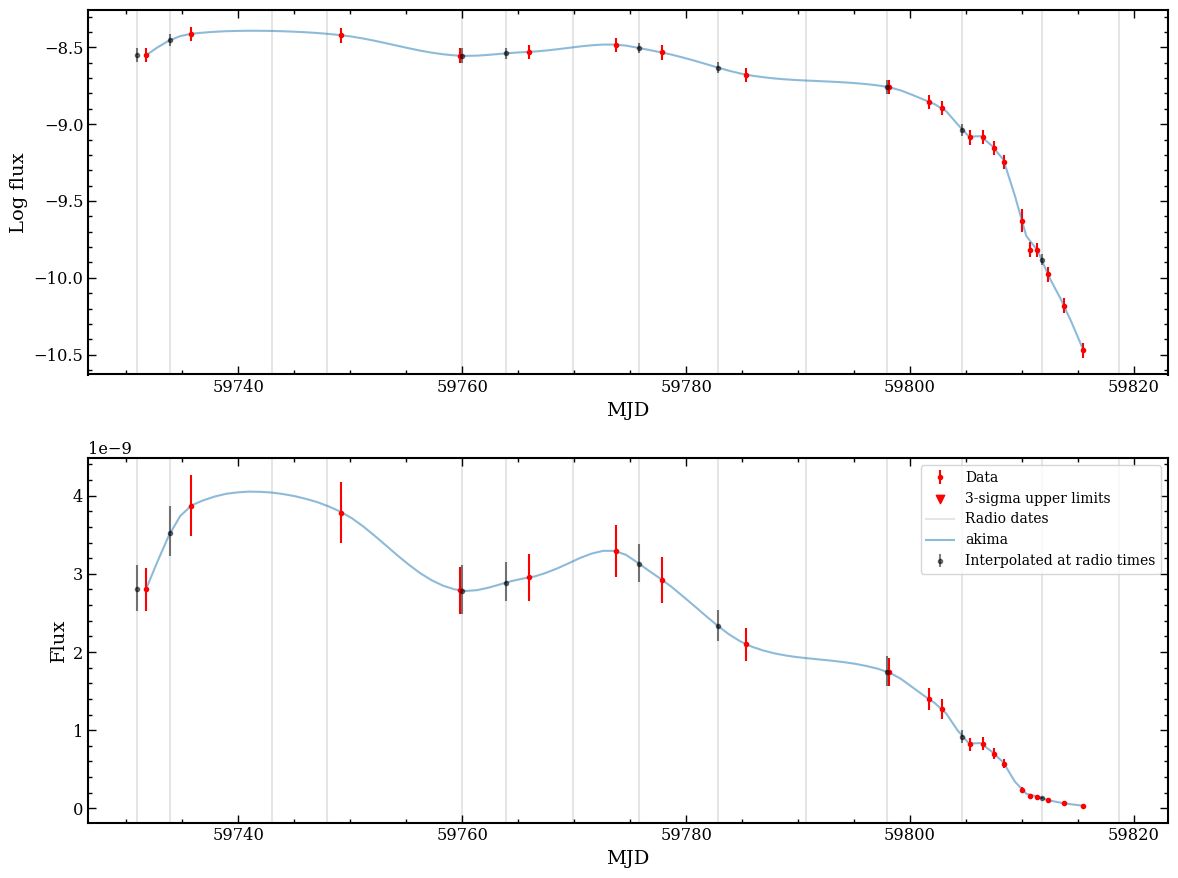

Number of used interpolated data points:  9
Converting to luminosity using d_kpc = 8.0


In [15]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df)

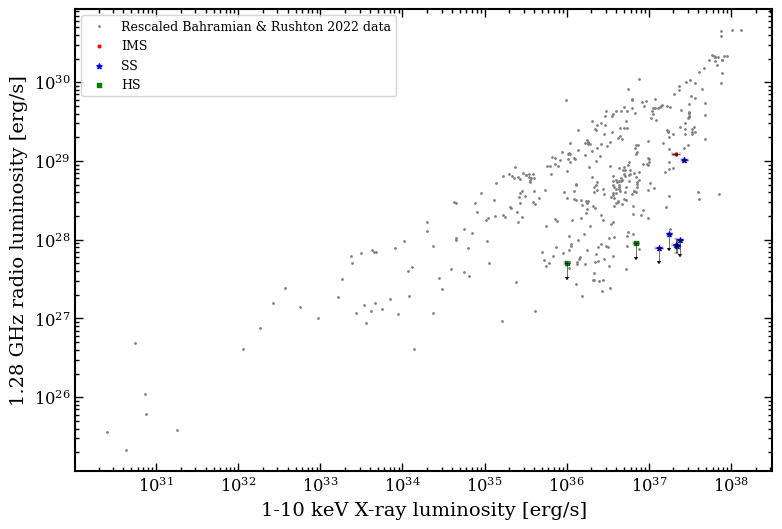

In [32]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)